# Predict the cancer death rate for the year

__Context:__<br>
As per WHO,

Cancer is the second leading cause of death globally, and is responsible for an estimated 10 million deaths in 2022. Globally, about 1 in 6 deaths is due to cancer.

Approximately 70% of deaths from cancer occur in low- and middle-income countries.

Around one third of deaths from cancer are due to the 5 leading behavioral and dietary risks: high body mass index, low fruit and vegetable intake, lack of physical activity, tobacco use, and alcohol use.    
__Problem Statement__
Many aspects of the behaviour of cancer disease are highly unpredictable. Even with the huge number of studies that have been done on the DNA mutation responsible for the disease, we are still unable to use these information at clinical level. However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can.

__Objective__ <br>
 build a machine learning  model that would predict the cancer death rate for the given year.
 
__Evaluation Criteria__<br>
Submissions are evaluated using Mean Squared Error (MSE).

__About the data__
The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

__Data Dictionary__
TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

### Import Libraries

In [355]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

### Load the data and display first 5 rows.

In [356]:
canc_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

tesst_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
canc_data.head(3)
#test_data.head(3)


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5


In [357]:
cancer_data = canc_data.copy()
test_data = tesst_data.copy()
cancer_data.tail(3)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
3048,1962.667684,7,453.549422,51923,3005,10.0,0.0,"(51046.4, 54545.6]",49.2,46.0,...,42.6,35.5,14.1,96.880078,0.519987,0.000000,1.527462,57.194505,9.725159,128.7
3049,85.000000,48,383.800000,40788,17199,19.8,0.0,"(40362.7, 42724.4]",42.0,36.5,...,33.3,40.2,22.5,91.590160,6.102872,0.476695,0.258945,52.060773,6.283214,209.2
3050,55.000000,27,341.600000,29415,10953,23.9,0.0,"[22640, 34218.1]",45.8,45.6,...,27.5,47.7,26.7,95.363876,0.236816,0.109300,0.537390,50.790016,10.046948,167.7


### Perform Exploratory Data Analysis

In [358]:
cancer_data.info()
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

__Observations__
- There are 34 columns including the target variable -TARGET_deathRate .
- There are null values in the three columns (PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone).
- There are two columns of type Object (Geography,binnedInc) and rest columns of type int64 or float64.

__drop duplicates and null values__ 

In [359]:
(cancer_data.isnull().sum() / cancer_data.shape[0])* 100

#(test_data.isnull().sum() / cancer_data.shape[0])* 100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.270731
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.981973
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.796788
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
PctPublicCoverageAlone      0.000000
P

__Observations__
- On visualizing the percentahe of null values in the columns
- Around 74% of PctSomeCol18_24, and 20% of PctPrivateCoverageAlone are Nan,these percentages are significant,also PctEmployed16_Over has 5% null values.

In [360]:
#checking whether the data contains any duplicate records
cancer_data.duplicated().sum()
#test_data.duplicated().sum()

766

In [361]:
#dropping the duplicates from train dataset

cancer_data.drop_duplicates(inplace=True)

cancer_data.shape, test_data.shape

((2285, 34), (762, 33))

In [362]:
#dropping the PctSomeCol18_24, PctPrivateCoverageAlone columns as they has more null values

cancer_data.drop(columns = ["PctSomeCol18_24"], inplace = True)

(cancer_data.isnull().sum() / cancer_data.shape[0]) * 100





avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          5.207877
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    20.175055
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
PctPublicCoverageAlone      0.000000
PctWhite                    0.000000
P

__Observations__
- PctEmployed16_Over still has 5% null values.

In [363]:
test_data.drop(columns = ["PctSomeCol18_24"], inplace = True)
(test_data.isnull().sum() / test_data.shape[0]) * 100


avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.330709
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.422572
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
PctPublicCoverageAlone      0.000000
PctWhite                    0.000000
P

In [364]:
cancer_data_columns = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate']

In [365]:
#checking the value counts of two categorical columns

for i in cancer_data.select_dtypes(include=object):
    
    print(cancer_data[i].value_counts(ascending=False))
    print("-" * 40)

(54545.6, 61494.5]    240
(37413.8, 40362.7]    236
(51046.4, 54545.6]    235
(42724.4, 45201]      233
[22640, 34218.1]      227
(40362.7, 42724.4]    225
(48021.6, 51046.4]    224
(45201, 48021.6]      224
(34218.1, 37413.8]    223
(61494.5, 125635]     218
Name: binnedInc, dtype: int64
----------------------------------------
Hettinger County, North Dakota                1
Custer County, Oklahoma                       1
Muscatine County, Iowa                        1
Eagle County, Colorado                        1
Richland County, Illinois                     1
                                             ..
Noble County, Indiana                         1
Flathead County, Montana                      1
Walton County, Georgia                        1
District of Columbia, District of Columbia    1
Navarro County, Texas                         1
Name: Geography, Length: 2285, dtype: int64
----------------------------------------


In [366]:
#dropping Geography column as it as more only one count in each unique value - high cardinality
#dropping the binnedInc column as we already have Medianincome of a country column
cancer_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)
test_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)

cancer_data.shape , test_data.shape

((2285, 31), (762, 30))

In [367]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,2285.0,571.234205,1190.111708,6.000000,78.000000,174.000000,512.000000,2.496500e+04
avgDeathsPerYear,2285.0,174.378993,421.262817,3.000000,29.000000,62.000000,149.000000,9.445000e+03
incidenceRate,2285.0,448.623549,53.820617,211.100000,421.400000,453.549422,480.900000,1.206900e+03
medIncome,2285.0,47074.547484,12060.339617,22640.000000,38928.000000,45193.000000,52526.000000,1.256350e+05
popEst2015,2285.0,94089.547046,260002.892625,827.000000,12103.000000,27020.000000,68348.000000,5.238216e+06
povertyPercent,2285.0,16.844114,6.367053,3.200000,12.100000,15.900000,20.400000,4.700000e+01
studyPerCap,2285.0,157.867047,545.021969,0.000000,0.000000,0.000000,85.804542,9.762309e+03
MedianAge,2285.0,44.651554,40.949109,22.300000,37.800000,40.900000,43.900000,5.256000e+02
MedianAgeMale,2285.0,39.553961,5.143357,22.400000,36.400000,39.500000,42.400000,6.470000e+01
MedianAgeFemale,2285.0,42.186389,5.225447,22.300000,39.100000,42.400000,45.300000,6.570000e+01


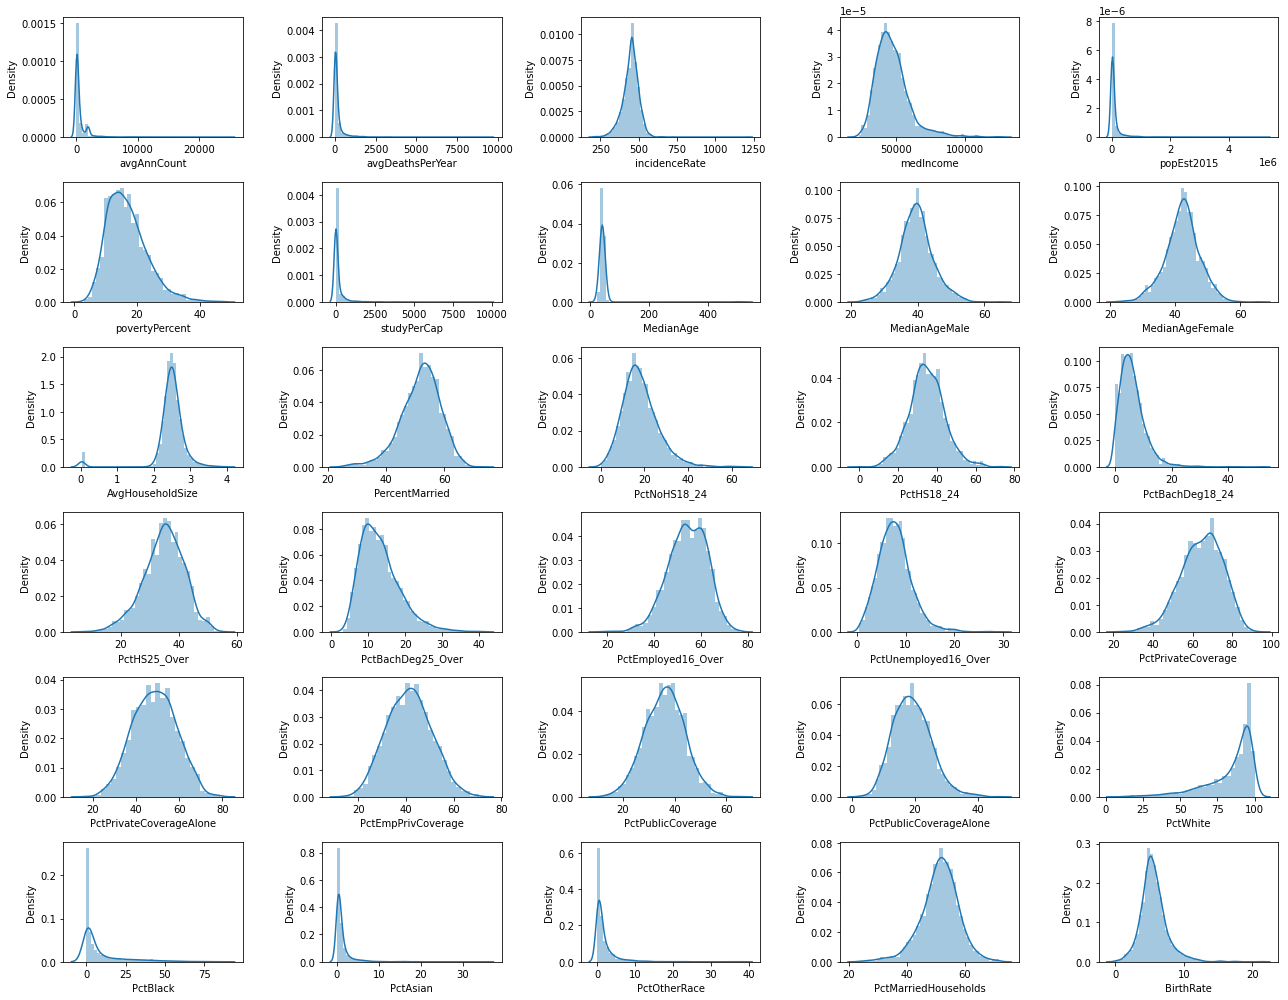

In [368]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_data.columns[:-1]):
    
    plot = sns.distplot(cancer_data[c] ,ax=axes[i])
plt.tight_layout()

__Observations__
- Most of the features follow the normal distribution
- PctWhite feature is left skewed
- PctBlack, PctAsian, PctOtherRace, AvgAnnount, avgDeathsPerYear, popEst2015, studyPerCap, MedianAge features are right skewed

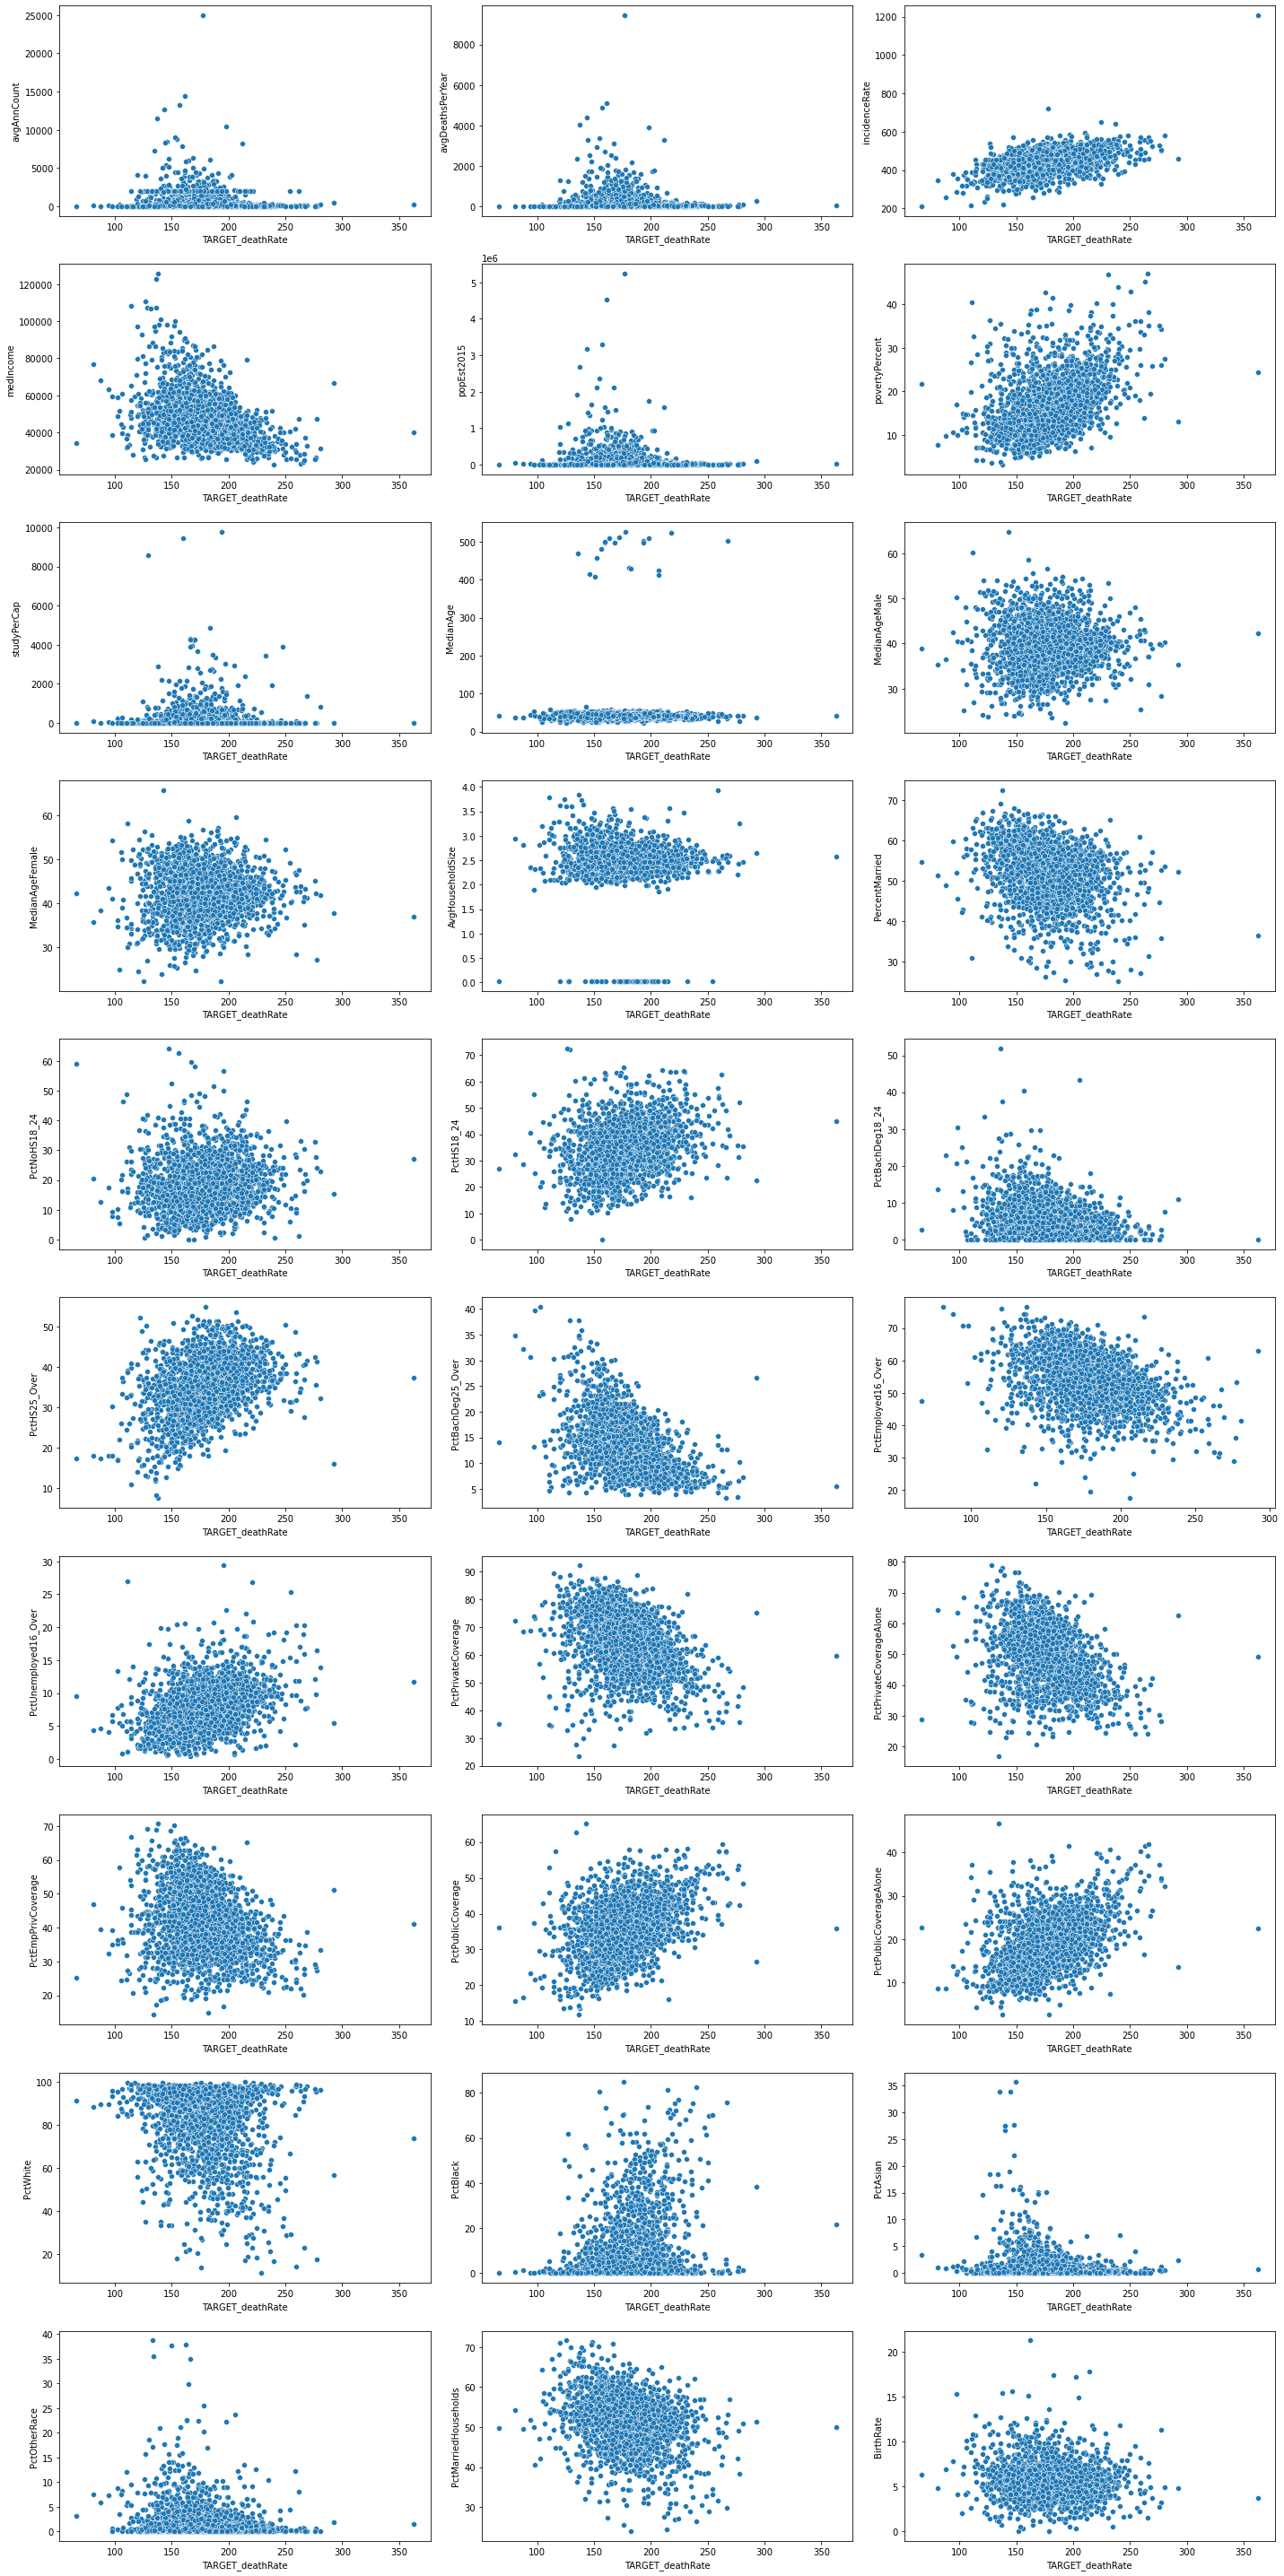

In [369]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_data.columns[:-1]):
    
    plot = sns.scatterplot(x="TARGET_deathRate",y=c,data=cancer_data,ax=axes[i])
plt.tight_layout()

__Observations__
- Incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone are positively correlated with the target variable
- medianIncome, PercentMarried, PctEmpPrivCoverage,PctPrivateCoverage, PctPrivateCoverageAlone, PctBatchDeg25_Over, PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
- Seems like avgAnnCount, avgDeathPerYear, IncidentRate, MedianAge,studyPerCap are having outliers with respect to the target variable

In [370]:
#sns.pairplot(cancer_data);

<AxesSubplot:>

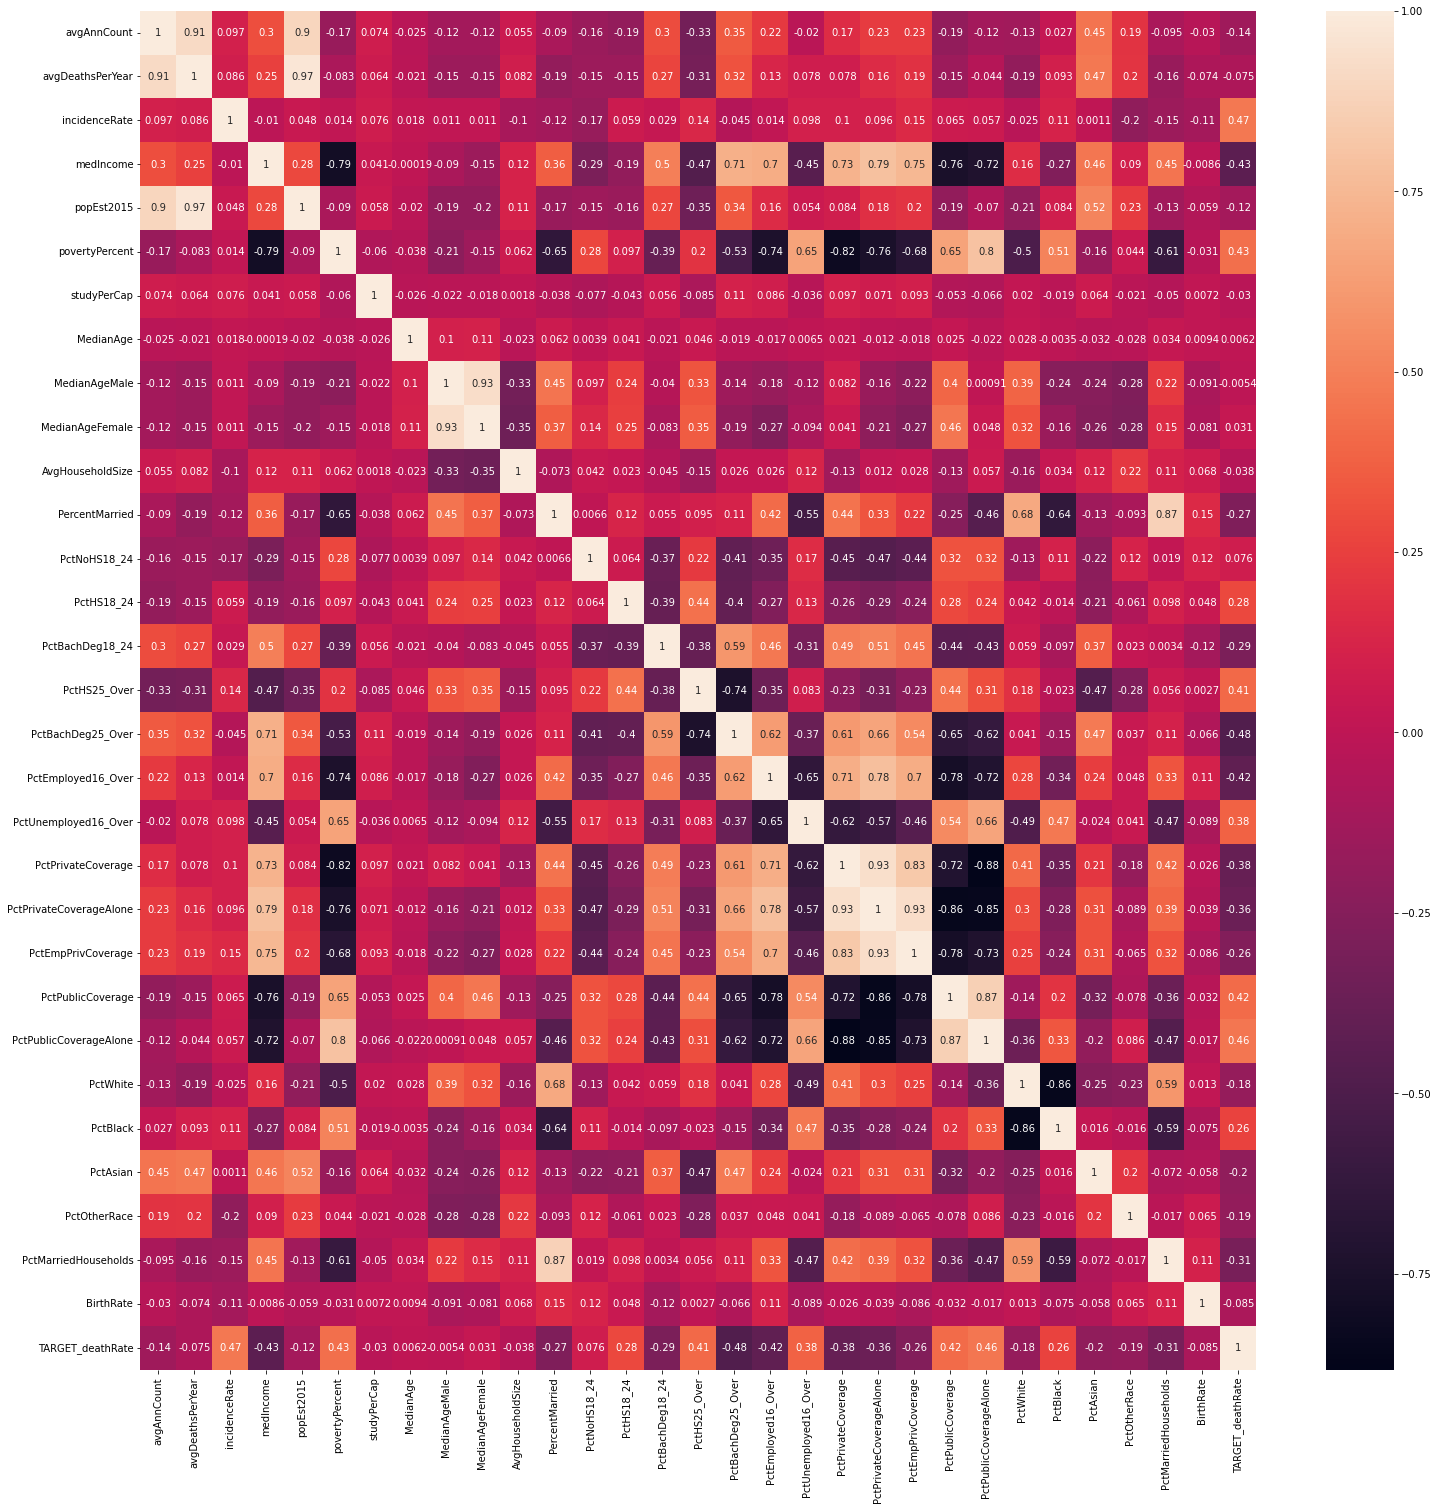

In [371]:
f,ax=plt.subplots(figsize=(25,25))
cor = cancer_data.corr()

sns.heatmap(cor,annot = True)

__Observations__
- As we inferred from the scatter plots, this heatmap shows that:incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone, are highly positively correlated with the target variable.
- Added to that, PctBlack is also positively correlated with the target variable.
- medianIncome, PercentMarried, PctBatchDeg25_Over,PctEmpPrivCoverage, PctPrivateCoverage, PctPrivateCoverageAlone, PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
- Added to that PctBatchDeg18_24,PctWhite, PctAsian, PctOtherRace are also negatively correlated with the target variable

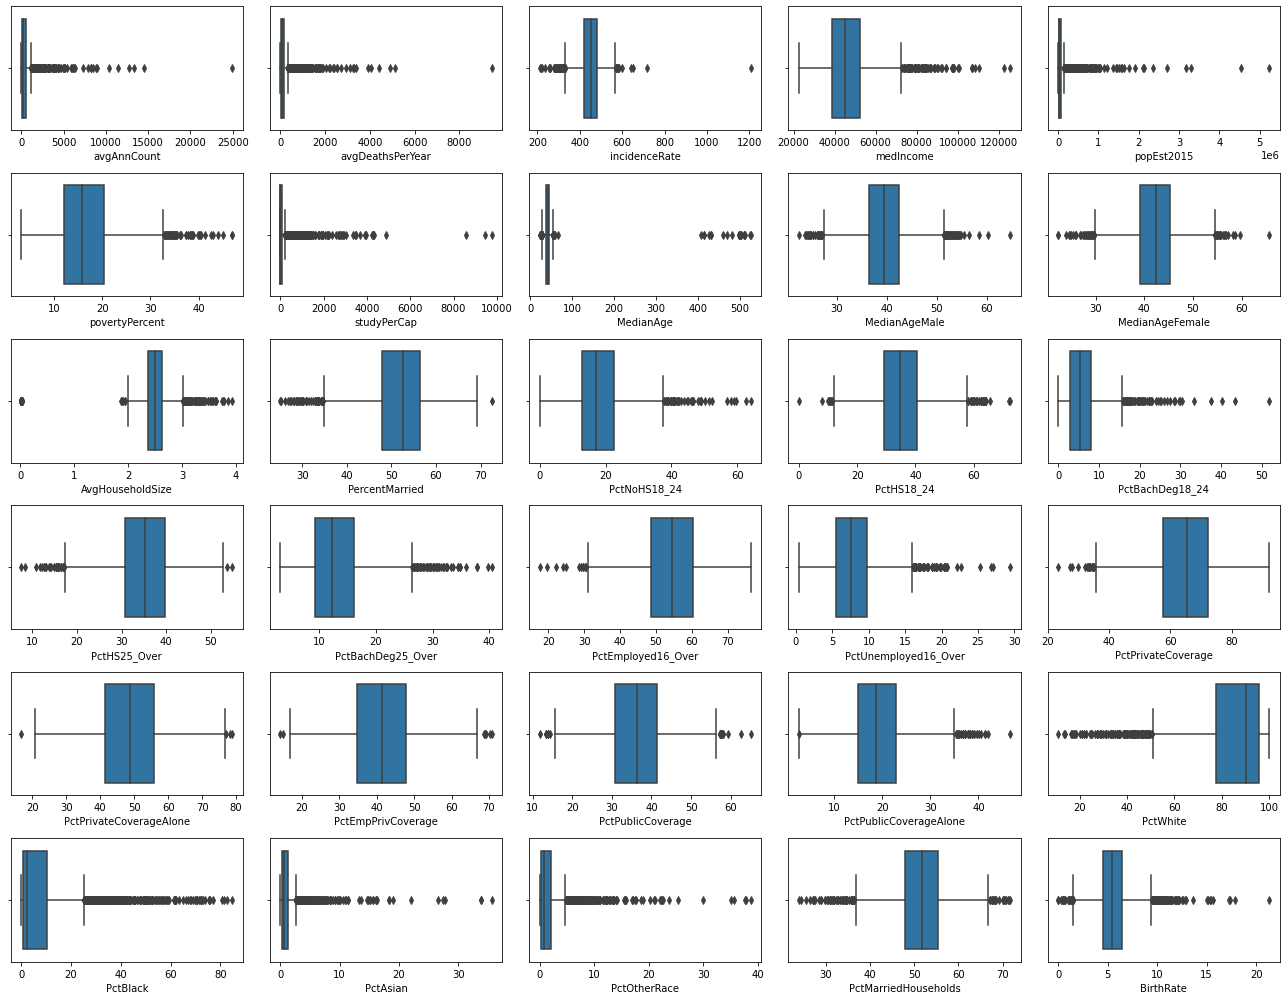

In [372]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_data.columns[:-1]):
    
    plot = sns.boxplot(data=cancer_data, x=c, ax=axes[i])
plt.tight_layout()

__Observations__
- As we suspected from the scatter plot, there are some outliers in these columnss:
avgAnnCount, avgDeathPerYear, IncidentRate, MedianAge,studyPerCap

### Separate the Input and Target Features of the data

In [373]:
X = cancer_data.drop(['TARGET_deathRate'], axis=1)
y = cancer_data['TARGET_deathRate']

X.shape , y.shape , test_data.shape


((2285, 30), (2285,), (762, 30))

### Split the data into Train and Test Sets¶

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.1, random_state= 42)

X_train.shape, X_test.shape ,test_data.shape

### Performing Data Preparation Steps

In [375]:
#filling the null values in these respective columns with the mean values
X_train['PctPrivateCoverageAlone'].fillna(X_train['PctPrivateCoverageAlone'].mean(),inplace=True)
X_train['PctEmployed16_Over'].fillna(X_train['PctEmployed16_Over'].mean(),inplace=True)


X_test['PctPrivateCoverageAlone'].fillna(X_test['PctPrivateCoverageAlone'].mean(),inplace=True)
X_test['PctEmployed16_Over'].fillna(X_test['PctEmployed16_Over'].mean(),inplace=True)

In [376]:
X_train.isnull().sum() #no null values in all the columns

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [377]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in X_train.select_dtypes(include=['float64','int64']):
    
    q1 = X_train[i].quantile(0.25)
    q3 = X_train[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_train = X_train[(X_train[i] < q1 - whisker_width*iqr) | (X_train[i] > q3 + whisker_width*iqr)]
    X_train.loc[X_train[i]>upper_whisker,i] = upper_whisker

In [378]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in X_test.select_dtypes(include=['float64','int64']):
    
    q1 = X_test[i].quantile(0.25)
    q3 = X_test[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = X_test[(X_test[i] < q1 - whisker_width*iqr) | (X_test[i] > q3 + whisker_width*iqr)]
    X_test.loc[X_test[i]>upper_whisker,i] = upper_whisker

In [379]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in test_data.select_dtypes(include=['float64','int64']):
    
    q1 = test_data[i].quantile(0.25)
    q3 = test_data[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = test_data[(test_data[i] < q1 - whisker_width*iqr) | (test_data[i] > q3 + whisker_width*iqr)]
    test_data.loc[test_data[i]>upper_whisker,i] = upper_whisker

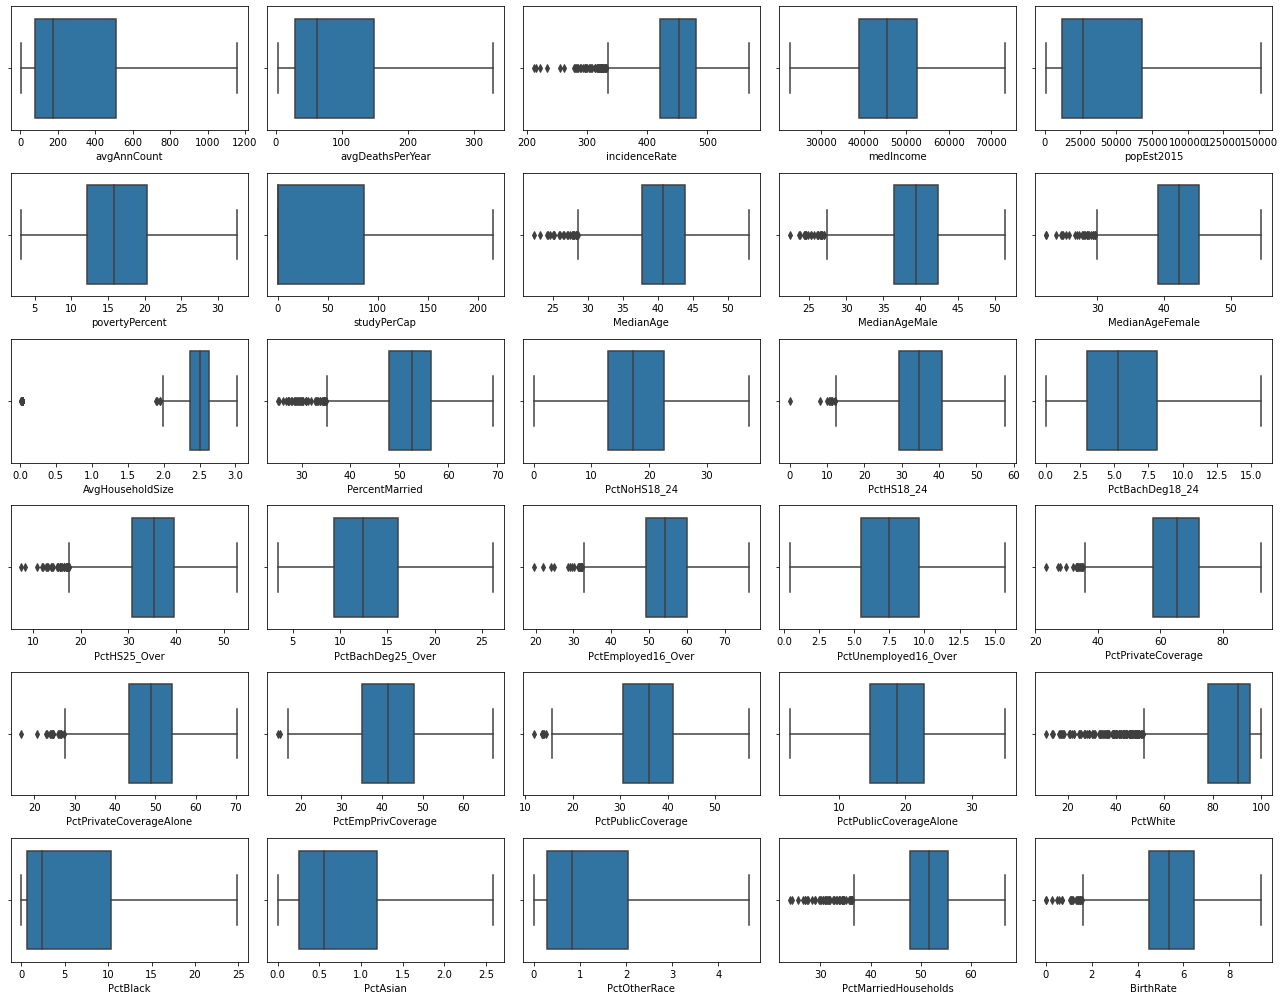

In [380]:
#there are no outliers in the data now
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(X_train.columns):
    
    plot = sns.boxplot(data=X_train, x=c, ax=axes[i])
plt.tight_layout()

## Building Machine Learning Model

__i)Linear Regression Model__

In [381]:
#Building the baseline model using the linearRegression algorithm

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train) #training the model
prediction=lr.predict(X_test) #predicting the target variable for the unseen data
mse = mean_squared_error(prediction,y_test)
mae =  mean_absolute_error(prediction,y_test)
rmse = np.sqrt(mean_squared_error(prediction,y_test))

In [382]:
#creating the dataframe with these error metrics values
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lrmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['LinearRegression'])
lrmodel

,mse,mae,rmse
LinearRegression,346.869971,14.768646,18.624446


### Other Models

__ii) Decision Tree Model__

In [383]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor() #decisiontree regression algorithm with the default parameters
dt.fit(X_train,y_train)
prediction=dt.predict(X_test)

In [384]:
mse=mean_squared_error(prediction,y_test)
mae=mean_absolute_error(prediction,y_test)
rmse=np.sqrt(mean_squared_error(prediction,y_test))

In [385]:
dtmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['DecisionTree'])
dtmodel

,mse,mae,rmse
DecisionTree,755.316987,20.718341,27.483031


__iii) RandomForest Model__

In [386]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor() #Random Forest Regression algorithm with the default parameters
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)

In [387]:
mse=mean_squared_error(prediction,y_test)
mae=mean_absolute_error(prediction,y_test)
rmse=np.sqrt(mean_squared_error(prediction,y_test))

In [388]:
rfmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['RandomForest'])
rfmodel

,mse,mae,rmse
RandomForest,313.791545,13.446921,17.714162


__iv) XGBoost Model__

In [389]:

import xgboost as xgb
xg = xgb.XGBRegressor()
from xgboost import plot_importance

#Xgboost regression algorithm with the default parameters
xg.fit(X_train, y_train)
prediction= xg.predict(X_test)

In [390]:
mse=mean_squared_error(prediction,y_test)
mae=mean_absolute_error(prediction,y_test)
rmse=np.sqrt(mean_squared_error(prediction,y_test))

In [391]:
xgmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['XGBoost'])
xgmodel

,mse,mae,rmse
XGBoost,298.277022,13.105815,17.270698


### SUMMARY OF THE ABOVE MODELS

In [392]:
models = pd.concat([lrmodel, dtmodel,rfmodel,xgmodel])
models

,mse,mae,rmse
LinearRegression,346.869971,14.768646,18.624446
DecisionTree,755.316987,20.718341,27.483031
RandomForest,313.791545,13.446921,17.714162
XGBoost,298.277022,13.105815,17.270698


__Observations__
- From all the above models, XGBRegressor performs well by giving the less mse value

### Hyperparameter Tuning

- From the above models, XGBRegressor gave the less mean squared error value.
- So, choosing this model to fine-tune further to achieve even more lesser mse value.
- Choosing the main three parameters of XGBoost Regressor:
 __n_estimators__,
__max_depth__,
__learning_rate__
- First, finding the best parameters value using RandomizedSearchCV as it takes less time to search and give the best values.
- Using that threshold values, creating another set of parameters and finding out the best from that using GridSearchCV

In [393]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=21)
X_train.shape , X_test.shape

((2056, 30), (229, 30))

In [394]:
xgb1 = xgb.XGBRegressor()
parameters = {
'n_estimators': [80, 90, 100, 125, 150,200,1000,2000,2050],
'max_depth': [2,3,4,5,8,16,None],
'learning_rate': [0.15, 0.1, 0.3, 0.5]
}
cv = RandomizedSearchCV(xgb1, parameters, cv=5)
cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                         

In [395]:
cv.best_params_

{'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.5}

- Building and fitting the model with the best parameters values {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 2000} provided by GridsearchCV

In [396]:
xg=xgb.XGBRegressor(n_estimators=2000,max_depth=2,learning_rate=0.15,n_jobs=-1,random_state=42)
xg.fit(X_train,Y_train)
prediction=xg.predict(X_test)

In [397]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [398]:
xgmodel_after_tuning=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['Tuned_XGBoost'])

xgmodel_after_tuning

,mse,mae,rmse
Tuned_XGBoost,192.331959,10.207673,13.86838


In [399]:
models = pd.concat([lrmodel, dtmodel,rfmodel,xgmodel,xgmodel_after_tuning])

models # as we can see that, this model has improved further by tuning it

,mse,mae,rmse
LinearRegression,346.869971,14.768646,18.624446
DecisionTree,755.316987,20.718341,27.483031
RandomForest,313.791545,13.446921,17.714162
XGBoost,298.277022,13.105815,17.270698
Tuned_XGBoost,192.331959,10.207673,13.868380


### Feature Selection - XGBoost

__Selecting only the important features to improve the model performance further__

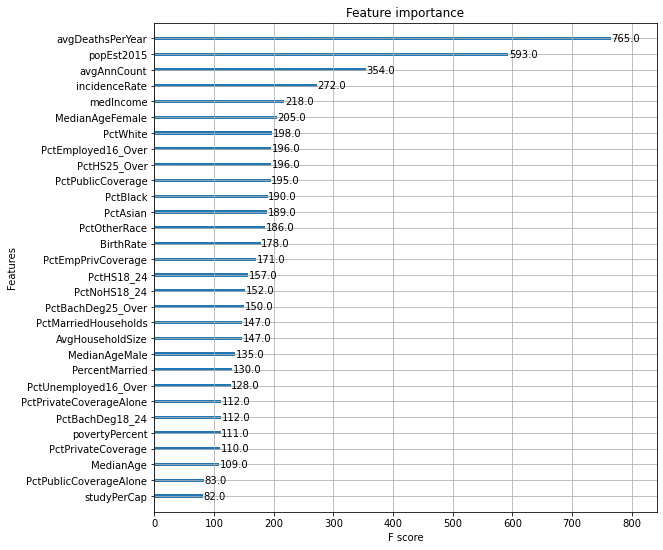

In [400]:
f,ax=plt.subplots(figsize=(9,9));
#it shows the feature score value from the xgboost model
plot_importance(xg,ax=ax);
plt.show()

In [401]:
#to see the feature and its importance value
feat_labels=X_train.columns.to_list()
for feature in zip(feat_labels, xg.feature_importances_):
    print(feature)

('avgAnnCount', 0.03311713)
('avgDeathsPerYear', 0.026492462)
('incidenceRate', 0.13950256)
('medIncome', 0.026299488)
('popEst2015', 0.019874807)
('povertyPercent', 0.09846683)
('studyPerCap', 0.012070259)
('MedianAge', 0.0077742776)
('MedianAgeMale', 0.011876406)
('MedianAgeFemale', 0.01222059)
('AvgHouseholdSize', 0.020157373)
('PercentMarried', 0.012966896)
('PctNoHS18_24', 0.0052723903)
('PctHS18_24', 0.024086855)
('PctBachDeg18_24', 0.010469814)
('PctHS25_Over', 0.069623195)
('PctBachDeg25_Over', 0.16564484)
('PctEmployed16_Over', 0.018695332)
('PctUnemployed16_Over', 0.04054624)
('PctPrivateCoverage', 0.016905354)
('PctPrivateCoverageAlone', 0.01380262)
('PctEmpPrivCoverage', 0.007978803)
('PctPublicCoverage', 0.009452082)
('PctPublicCoverageAlone', 0.09653303)
('PctWhite', 0.012312152)
('PctBlack', 0.022817437)
('PctAsian', 0.009464801)
('PctOtherRace', 0.025950098)
('PctMarriedHouseholds', 0.020308077)
('BirthRate', 0.009317862)


In [402]:
#selecting only the features which is greater than or equal to that threshold value
from sklearn.feature_selection import SelectFromModel # to select the best features from the model

selection = SelectFromModel(xg,threshold=0.0134)
selection.fit(X_train, Y_train)

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=0.15, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=2,
                                  

In [403]:
# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

# train model
selection_model = xgb.XGBRegressor(n_estimators=3500,max_depth=2,learning_rate=0.15,n_jobs=-1,random_state=21)
selection_model.fit(select_X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=21, ...)

In [404]:
final_features=[]
for feature_list_index in selection.get_support(indices=True):
    final_features.append(feat_labels[feature_list_index])

In [405]:
#final features after the transformation
#There are around 18 features
for feature in zip(final_features, selection_model.feature_importances_):
    print(feature)

('avgAnnCount', 0.031858593)
('avgDeathsPerYear', 0.06561864)
('incidenceRate', 0.13410178)
('medIncome', 0.03339154)
('popEst2015', 0.04068177)
('povertyPercent', 0.097663924)
('AvgHouseholdSize', 0.03177809)
('PctHS18_24', 0.028441103)
('PctHS25_Over', 0.08884326)
('PctBachDeg25_Over', 0.18044409)
('PctEmployed16_Over', 0.021842878)
('PctUnemployed16_Over', 0.054691374)
('PctPrivateCoverage', 0.021985458)
('PctPrivateCoverageAlone', 0.014623651)
('PctPublicCoverageAlone', 0.07296994)
('PctBlack', 0.029064981)
('PctOtherRace', 0.029222542)
('PctMarriedHouseholds', 0.022776473)


In [406]:
prediction=selection_model.predict(select_X_test) #predicting the model with the selected features
mean_squared_error(prediction,Y_test)

181.62641990419075

In [407]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [408]:
xgmodel_after_feature_selected=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['Feature_Selected_XGBoost'])

In [409]:
models = pd.concat([lrmodel, dtmodel,rfmodel,xgmodel,xgmodel_after_tuning,xgmodel_after_feature_selected])

In [410]:
xgmodel_after_feature_selected=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['Feature_Selected_XGBoost'])

models


,mse,mae,rmse
LinearRegression,346.869971,14.768646,18.624446
DecisionTree,755.316987,20.718341,27.483031
RandomForest,313.791545,13.446921,17.714162
XGBoost,298.277022,13.105815,17.270698
Tuned_XGBoost,192.331959,10.207673,13.868380
Feature_Selected_XGBoost,181.626420,10.330726,13.476885


__Observations__
- We can see that the model has improved further with the less mse value

### Predictions on test_data
- Loading the data, filling the missing values and replacing the outliers with the upper whisker values are done in the previous steps in the respective tasks

In [411]:
test_data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [415]:
#transform the test features and predict the target
select_test = selection.transform(test_data)
pred_test=selection_model.predict(select_test)

In [417]:
#creating the dataframe with the predicted value of the test dataset
df=pd.DataFrame({"prediction":pred_test})
df.to_csv("xg5.csv",index=False) #converting the dataframe to csv for submission

In [420]:
#visualize our predicted values
ss = pd.read_csv("xg5.csv")
ss.head()

,prediction
0,121.019684
1,190.157180
2,147.884140
3,154.600100
4,161.848860


### Conclusion:

- XGBoost model performed better than LinearRegression, Decisiontree and Randomforest model.
- Decisiontree Regressor gave the highest mse compare to all the other models and showed the poor performance.
- It is clearly observable that how the mse value decresed from the baseline XGBoost model to the tunedXGBoost model and further reduced the mse value with the featureselected XGBoost model.
- We can see that most of the selected features by the XGBoost model are positively or negatively correlated with the target variable as we already inferred from the heatmap and scatterplot.
- Data standardization reduced the model performance. So here data is neither standardized nor normalised. Used the data as it is.
- Feature selection by Boruta didn't work so well with this dataset.
- Also, random_state plays the major role.